## Content

## 01. Import libraries
## 02. Import data
## 03. Exercise 4.7 Part 1
## 04. Exercise 4.7 Part 2

## 01. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path

path = r'C:\Users\Frederick\Documents\07-12-2023 Instacart Basket Analysis'

## 02. Import data

In [3]:
# Import data for orders_products merged

df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_productsID_combined.pkl'))

## 03. Exercise 4.7 Part 1

In [4]:
# Create subset for first one million rows

df = df_ords_prods_merge[:1000000]

In [5]:
# Create definition for price_label

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [6]:
# Checking total/shape of the subset with one millions rows

df.shape

(1000000, 18)

In [7]:
# Categorise low, mid and high range products

df['price_range'] = df.apply(price_label, axis=1)

C:\Users\Frederick\AppData\Local\Temp\ipykernel_3416\2672419056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [8]:
# Checking output on column price_range

df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    756450
Low-range product    243550
Name: count, dtype: int64

In [9]:
# Checking maximum price for product withint subset

df['prices'].max()

14.8

In [10]:
# Creating price range conditions with loc - high range

df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_3416\577804458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'
C:\Users\Frederick\AppData\Local\Temp\ipykernel_3416\577804458.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-range product' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [11]:
# Creating price range conditions with loc - mid range

df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [12]:
# Creating price range conditions with loc - low range

df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [13]:
# Checking output on column price_range with loc

df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product    756450
Low-range product    243550
Name: count, dtype: int64

In [14]:
# Creating price range conditions with loc - high range for all data

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_3416\1597873281.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High-range product' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [36]:
# Creating price range conditions with loc - mid range for all data

df_ords_prods_merge.loc[(df_ords_prods_merge['prices'] <= 15) & (df_ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [37]:
# Creating price range conditions with loc - low range for all data

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [38]:
df_ords_prods_merge['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

In [18]:
# Getting the total counts of orders by day of week

df_ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [19]:
# Create for loop for busiet day

result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [20]:
# Create new column call busiet day

df_ords_prods_merge['busiest_day'] = result

In [21]:
# Check output for busiet day

df_ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

## 04. Exercise 4.7 Part 2

In [22]:
# Q2.Create for loop for busiet days

result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0: 
    result.append("Busiest days")
  elif value == 1:
    result.append("Busiest days")
  elif value == 3:
    result.append("Slowest days")
  elif value == 4:
    result.append("Slowest days")
  else:
    result.append("Regular days")

In [24]:
# Create new column call busiet days

df_ords_prods_merge['busiest_days'] = result

In [25]:
# Check output for busiet days

df_ords_prods_merge['busiest_days'].value_counts(dropna = False)

busiest_days
Regular days    12916111
Busiest days    11864412
Slowest days     7624336
Name: count, dtype: int64

## Q3. The values of the new column 'busiest_days' matched the 'orders_day_of_week'. Saturday (0) and Sunday (1) are the busiest, and the count is 11864412. Tuesday (3) and Wednesday (4) are the slowest days and the count is 7624336.

In [26]:
df_ords_prods_merge.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,exists,price_range_loc,busiest_day,busiest_days
0,0,0,2539329,1,1,2,8,NaN,196,1,...,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regular days
1,1,1,2398795,1,2,3,7,15.0,196,1,...,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days
2,2,2,473747,1,3,3,12,21.0,196,1,...,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days
3,3,3,2254736,1,4,4,7,29.0,196,1,...,both,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days
4,4,4,431534,1,5,4,15,28.0,196,1,...,both,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days


In [27]:
# Q4.Getting the total counts for order_hour_of_day

df_ords_prods_merge['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [28]:
# Creating busiest hours of the day with loc - Most orders

df_ords_prods_merge.loc[(df_ords_prods_merge['order_hour_of_day'] <= 17) & (df_ords_prods_merge['order_hour_of_day'] > 8), 'busiest_period_of_day'] = 'Most orders'

C:\Users\Frederick\AppData\Local\Temp\ipykernel_3416\3297959446.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Most orders' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_ords_prods_merge.loc[(df_ords_prods_merge['order_hour_of_day'] <= 17) & (df_ords_prods_merge['order_hour_of_day'] > 8), 'busiest_period_of_day'] = 'Most orders'


In [29]:
# Creating busiest hours of the day with loc - Fewest orders

df_ords_prods_merge.loc[df_ords_prods_merge['order_hour_of_day'] < 7, 'busiest_period_of_day'] = 'Fewest orders'

In [30]:
# Creating busiest hours of the day with loc - Average orders 1

df_ords_prods_merge.loc[df_ords_prods_merge['order_hour_of_day'] > 17, 'busiest_period_of_day'] = 'Average orders'

In [31]:
# Creating busiest hours of the day with loc - Average orders 2

df_ords_prods_merge.loc[(df_ords_prods_merge['order_hour_of_day'] >= 7) & (df_ords_prods_merge['order_hour_of_day'] <= 9), 'busiest_period_of_day'] = 'Average orders'

In [32]:
# Getting the total counts of new column 'busiest_period_of_day'
df_ords_prods_merge['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most orders       20751522
Average orders    10766516
Fewest orders       886821
Name: count, dtype: int64

## Q4 & 5, I first display the fequency on the order_hour_by_day to determine which hours have the most order. After looking at the frequency, I selected orders above 2 millions as 'Most orders' and the corresponding hours are from 9am to 5pm. For the 'Fewest orders', I've classified it as orders below 300000 and the corresponding hours are from 12am to 6am. The rest of hours (7am to 9am, and 5pm to 11pm) are grouped as 'Average orders'. As can be seen from the above table, the frequency of the new column 'busiest_period_of_day' with the Most, Average and Fewest orders matched the frequency table for the order_hour_of_day. 

In [33]:
# Export data to pkl

df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_added_variables.pkl'))

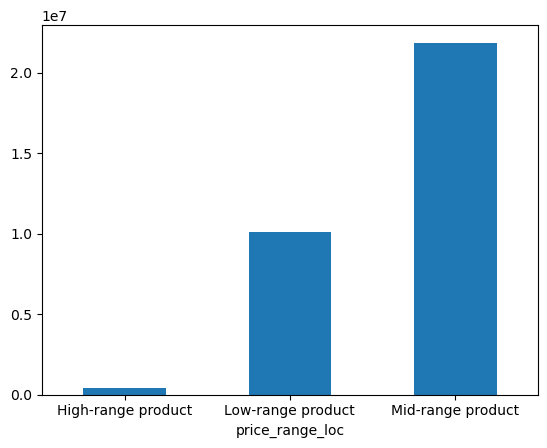

In [39]:
# Creating bar chart for price range

ax8 = df_ords_prods_merge['price_range_loc'].value_counts().sort_index().plot.bar(rot=0)

In [40]:
ax8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))